In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("dataDWM.xlsx")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [2]:
df.shape

(2240, 29)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [5]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [6]:
df=df.drop(columns=["ID","Z_CostContact", "Z_Revenue"],axis=1)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

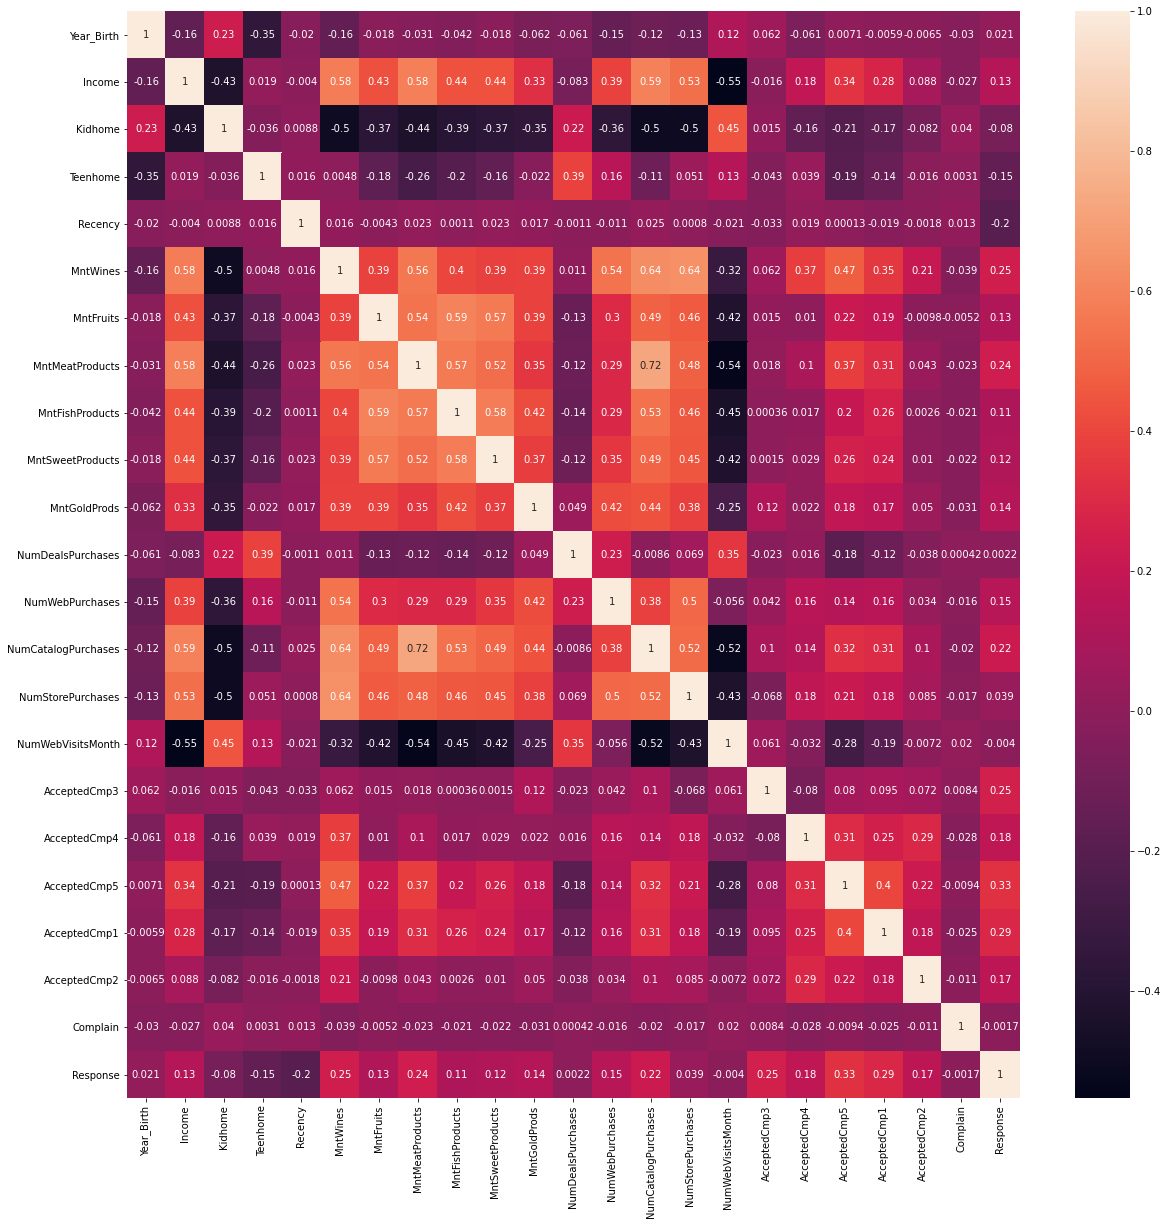

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [9]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [10]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [11]:
df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [12]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [13]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'higher')  

In [14]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['Age'] = 2021 - df["Year_Birth"]


In [15]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '15-10-2021'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [16]:
col_del = ["Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","AcceptedCmp1" , "AcceptedCmp2",
           "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases",
           "NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
           "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

Education Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0    higher         Single  58138.0     0      1617                 1   
1    higher         Single  46344.0     2        27                 0   
2    higher   relationship  71613.0     0       776                 0   
3    higher   relationship  26646.0     1        53                 0   
4    higher   relationship  58293.0     1       422                 0   

   NumTotalPurchases  Age  day_engaged  
0                 25   64         3328  
1                  6   67         2778  
2                 21   56         2977  
3                  8   37         2804  
4                 19   40         2826

In [17]:
df.shape

(2240, 9)

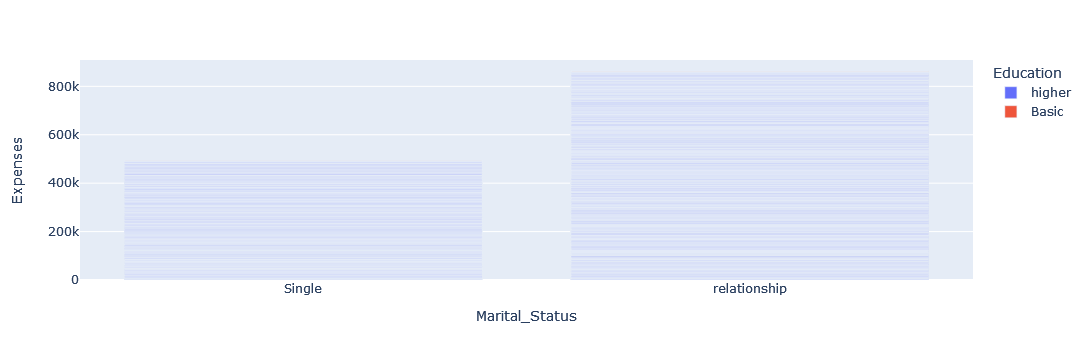

In [18]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education" )
fig.show()

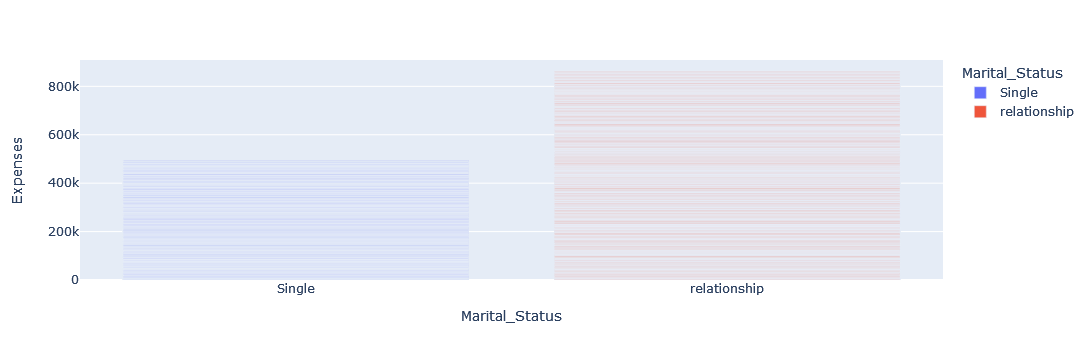

In [19]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

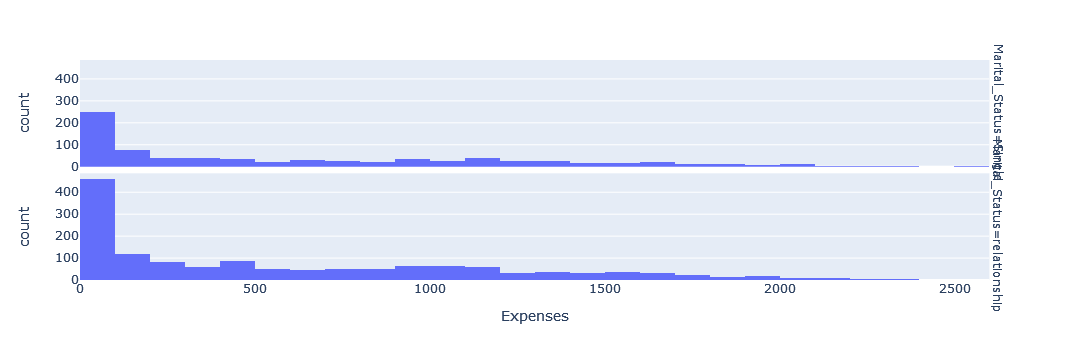

In [20]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status")
fig.show ()

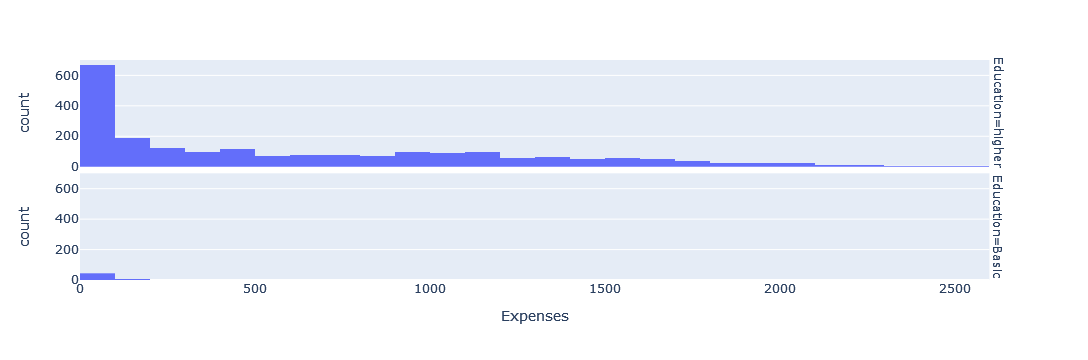

In [21]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education")
fig.show ()

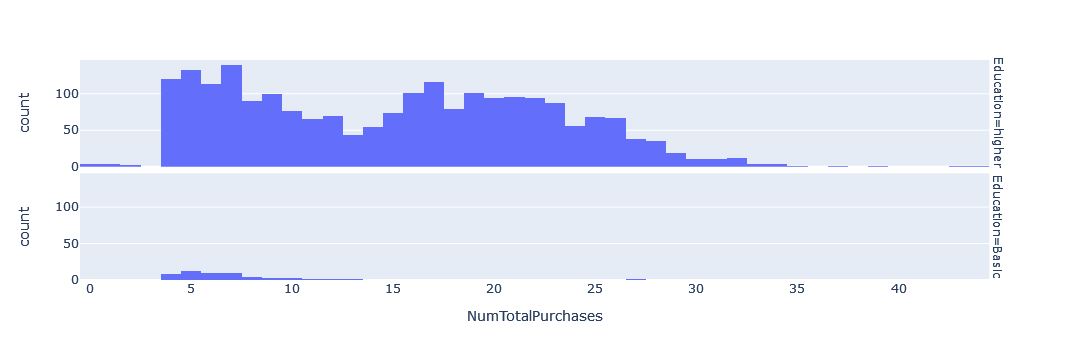

In [22]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education")
fig.show ()

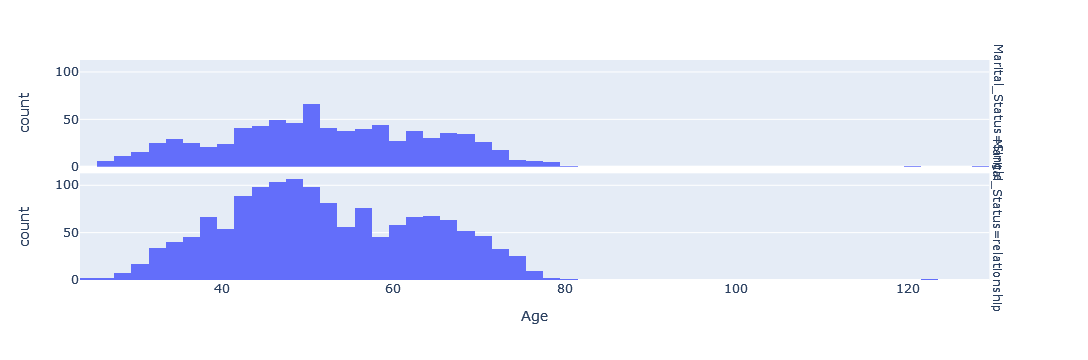

In [23]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status")
fig.show ()

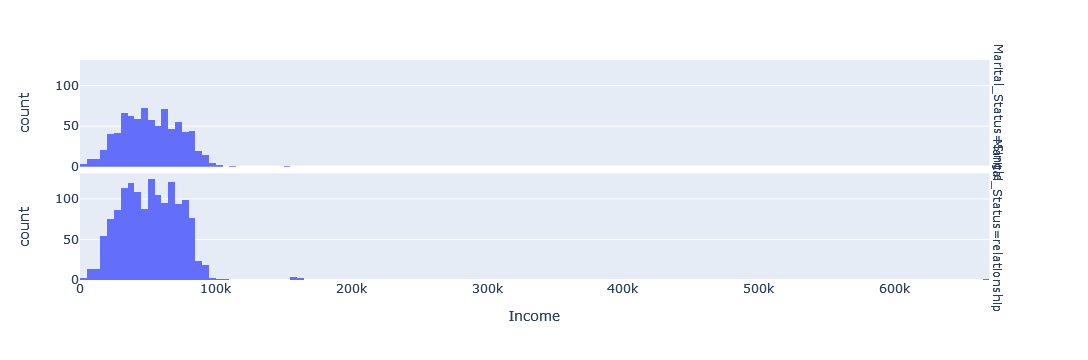

In [24]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status")
fig.show ()

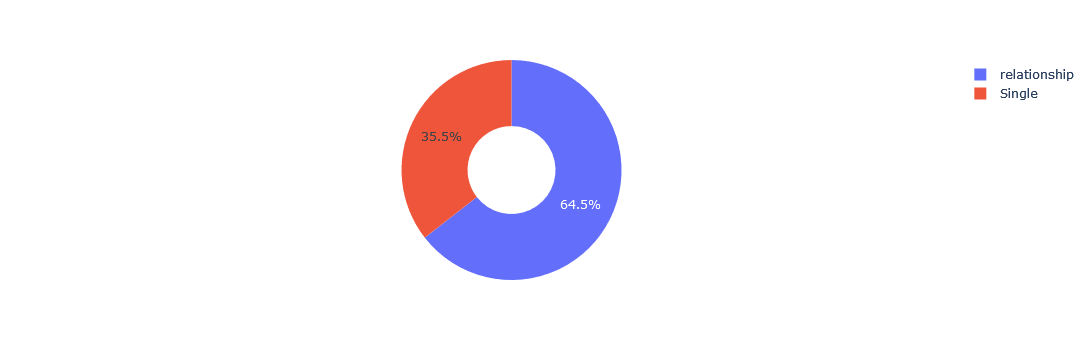

In [25]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4)
fig.show ()

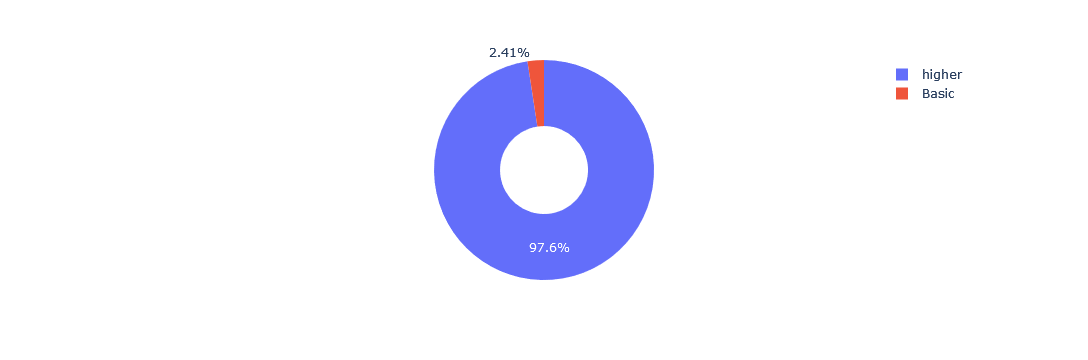

In [26]:
fig =  px.pie (df, names = "Education", hole = 0.4)
fig.show ()

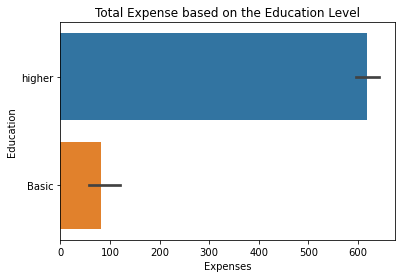

In [27]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

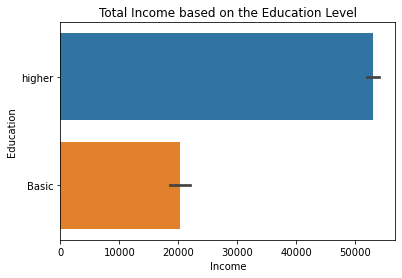

In [28]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

In [29]:
df.describe()

Income         Kids     Expenses  TotalAcceptedCmp  \
count    2240.000000  2240.000000  2240.000000       2240.000000   
mean    52247.251354     0.950446   605.798214          0.446875   
std     25037.797168     0.751803   602.249288          0.890543   
min      1730.000000     0.000000     5.000000          0.000000   
25%     35538.750000     0.000000    68.750000          0.000000   
50%     51741.500000     1.000000   396.000000          0.000000   
75%     68289.750000     1.000000  1045.500000          1.000000   
max    666666.000000     3.000000  2525.000000          5.000000   

       NumTotalPurchases          Age  day_engaged  
count        2240.000000  2240.000000  2240.000000  
mean           14.862054    52.194196  3018.582143  
std             7.677173    11.984069   202.122512  
min             0.000000    25.000000  2665.000000  
25%             8.000000    44.000000  2845.750000  
50%            15.000000    51.000000  3020.500000  
75%            21.000000    62.000000  3194.000000  
max            44.000000   128.000000  3364.000000

<AxesSubplot:>

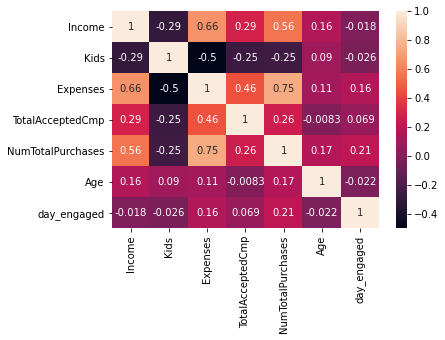

In [30]:
sns.heatmap(df.corr(), annot=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Kids               2240 non-null   int64  
 4   Expenses           2240 non-null   int64  
 5   TotalAcceptedCmp   2240 non-null   int64  
 6   NumTotalPurchases  2240 non-null   int64  
 7   Age                2240 non-null   int64  
 8   day_engaged        2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
r = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        r.append(i)
lbl_encode = LabelEncoder()
for i in r:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [33]:
df['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [34]:
df['Education'].value_counts()

1    2186
0      54
Name: Education, dtype: int64

In [35]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
X = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
X.head()

Education  Marital_Status    Income      Kids  Expenses  TotalAcceptedCmp  \
0   0.157171       -1.346874  0.235327 -1.264505  1.679417          0.621248   
1   0.157171       -1.346874 -0.235826  1.396361 -0.961275         -0.501912   
2   0.157171        0.742460  0.773633 -1.264505  0.282673         -0.501912   
3   0.157171        0.742460 -1.022732  0.065928 -0.918094         -0.501912   
4   0.157171        0.742460  0.241519  0.065928 -0.305254         -0.501912   

   NumTotalPurchases       Age  day_engaged  
0           1.320826  0.985345     1.531185  
1          -1.154596  1.235733    -1.190545  
2           0.799685  0.317643    -0.205773  
3          -0.894025 -1.268149    -1.061881  
4           0.539114 -1.017761    -0.953012

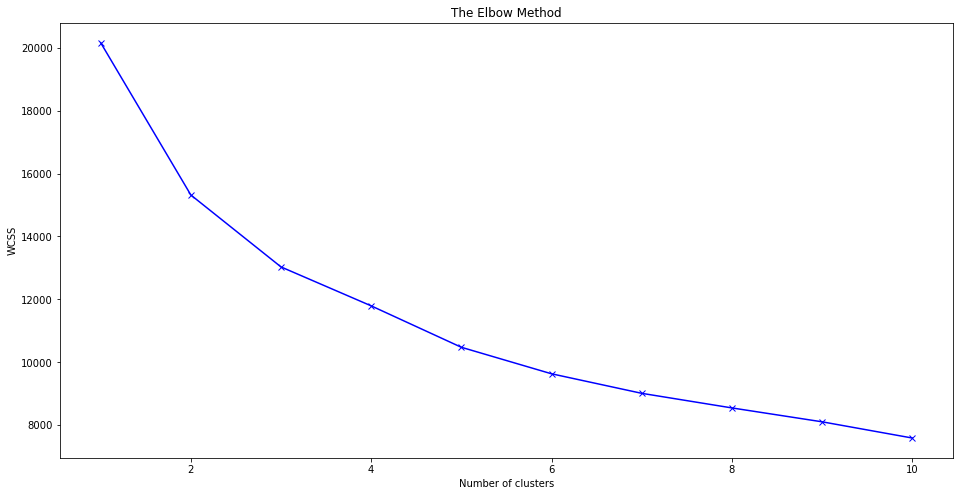

In [36]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=100)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=100)
    c = m1.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, m1.fit_predict(X))) 
silhouette_scores

[0.24115026328018935,
 0.2625903534975943,
 0.2011090027707381,
 0.20869974559593957,
 0.21438487183633634,
 0.19941870876236137,
 0.19492544614764104,
 0.18378824560588874]

In [38]:
print("number of cluster with max silhoutte score =" , (silhouette_scores.index(max(silhouette_scores))+2))

number of cluster with max silhoutte score = 3


In [39]:
kmeans=KMeans(n_clusters=3, random_state=100)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df['cluster'] =  y_kmeans + 1

In [40]:
df.head()

Education  Marital_Status   Income  Kids  Expenses  TotalAcceptedCmp  \
0          1               0  58138.0     0      1617                 1   
1          1               0  46344.0     2        27                 0   
2          1               1  71613.0     0       776                 0   
3          1               1  26646.0     1        53                 0   
4          1               1  58293.0     1       422                 0   

   NumTotalPurchases  Age  day_engaged  cluster  
0                 25   64         3328        2  
1                  6   67         2778        1  
2                 21   56         2977        2  
3                  8   37         2804        1  
4                 19   40         2826        1

In [41]:
df['cluster'].value_counts()

1    1191
2     995
3      54
Name: cluster, dtype: int64

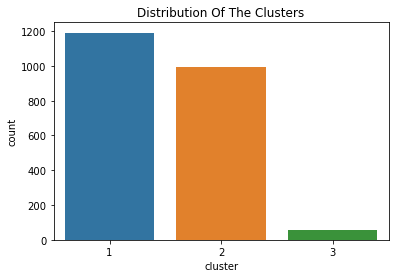

In [42]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

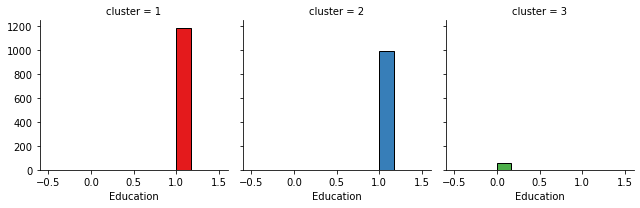

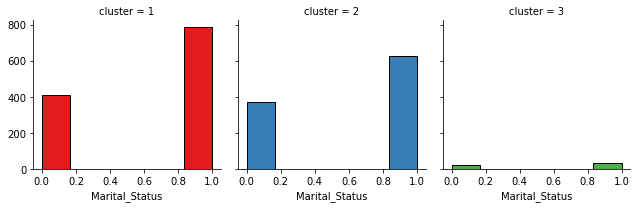

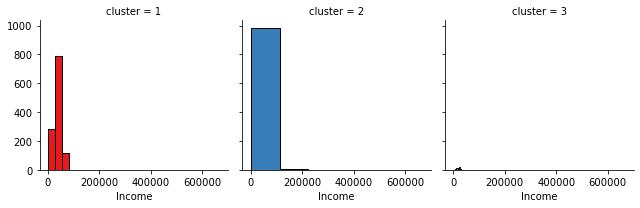

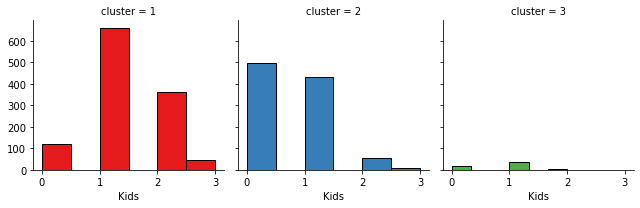

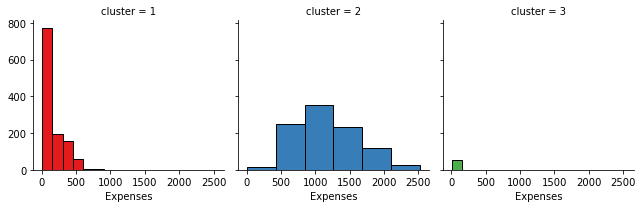

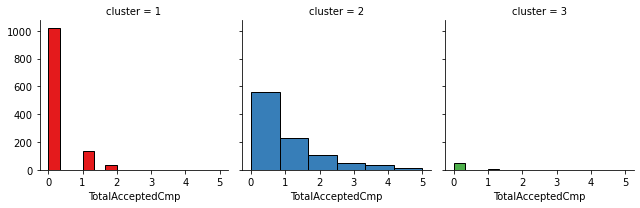

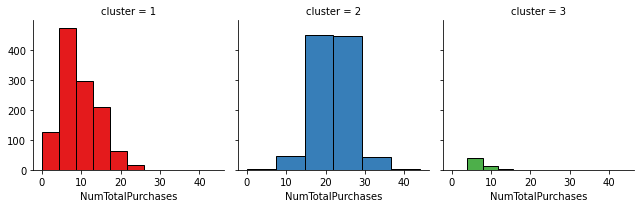

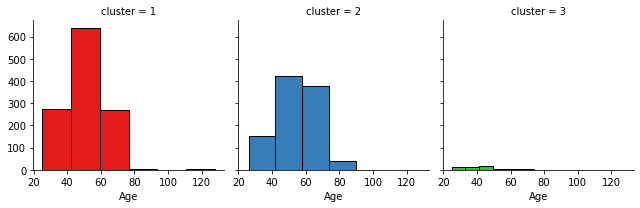

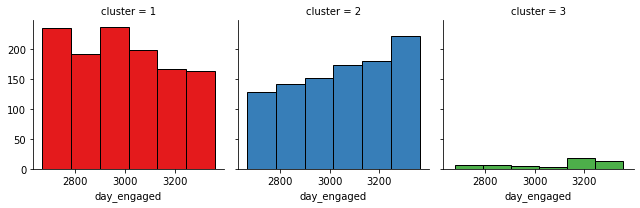

In [43]:
j=0
for i in df:
    if j==9: break;
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k")
    j+=1

In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [45]:
test_y=test['Expenses']

In [46]:
test_x=test.drop(columns=['Expenses','cluster'],axis=1)

In [47]:
train_x=train.drop(columns=['Expenses','cluster'],axis=1)

In [48]:
train_y=train['Expenses']

In [49]:
from sklearn import linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print('Coefficients: ', reg.coef_)

Coefficients:  [-4.49881071e+01  5.89725165e+00  1.25260974e-02 -1.75917708e+02
  1.15759886e+02  2.73495801e+01 -4.24526494e-01  2.50098117e-01]


In [51]:
from sklearn.metrics import mean_squared_error
train_pred=reg.predict(train_x)
test_pred=reg.predict(test_x)
print("training MSE =" ,mean_squared_error(train_y,train_pred))
print("test MSE =" ,mean_squared_error(test_y,test_pred))


training MSE = 72297.34923982254
test MSE = 219665.18856898224


In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500)
regressor.fit(train_x, train_y)
train_pred=regressor.predict(train_x)
test_pred=regressor.predict(test_x)
print("training MSE =" ,mean_squared_error(train_y,train_pred))
print("test MSE =" ,mean_squared_error(test_y,test_pred))

training MSE = 6569.310684334821
test MSE = 50085.92799724108
